In [2]:
import numpy as np


In [3]:
def f(x): #test function
    return x**4 - 2*x + 1


# Trapezoidal rule

In [23]:
# N = 10
# a,b = 0,2
# h = (b-a)/N
# points = np.linspace(a,b, N+1)
# area = 0
# for i in range(N):
#     f1, f2 = f(points[i]), f(points[i+1])
#     area += 0.5*h*(f1+f2)
# print(area)

# Vectorize for faster computation 
# N = 10
# a,b = 0,2
# h = (b-a)/N
# points = np.linspace(a,b, N+1) 
# func_vals = f(points)
# print(func_vals)
# func_vals[1:-1]
# integral = h*((0.5)*func_vals[0] + 0.5*func_vals[-1] + np.sum(func_vals[1:-1]))
# print(integral)


[ 1.      0.6016  0.2256 -0.0704 -0.1904  0.      0.6736  2.0416  4.3536
  7.8976 13.    ]
4.50656


# Simpson's Rule

In [40]:
# N = 10 #even slices only
# a,b = 0,2 
# h = (b-a)/N 
# points = np.linspace(a,b, N+1)
# area = 0 
# for i in range(N//2):
#     #print(f'quadratic curve number: {i}')
#     p1, p2, p3 = a+2*i*h, a + (2*i+1)*h, a + (2*i+2)*h 
#     #print(f'(p1,p2,p3): {(p1,p2,p3)}')
#     cumulate = (h/3)*(f(p1)+4*f(p2)+f(p3))
#     area += cumulate
#     #print(f'area: {cumulate} \n')
# area

#Vectorize for faster computation 
# N = 100 #even slices only
# a,b = 1,2 
# h = (b-a)/N 
# points = np.linspace(a,b, N+1) 
# func_vals = f(points) 
# print(points)
# print(func_vals)
# size = len(func_vals)
# odds = func_vals[[k for k in range(1,size,2)]]
# evens = func_vals[[i for i in range(2,size-1,2)]]
# integral = (h/3)*(func_vals[0] + func_vals[-1] + 4*np.sum(odds) + 2*np.sum(evens))
# print(odds)
# print(evens)
# print(integral)

4.200000001333334


In [41]:
def simpson(f, N, a, b, debug=False):
    h = (b-a)/N 
    points = np.linspace(a,b, N+1) 
    func_vals = f(points) 
    size = len(func_vals)
    odds = func_vals[[k for k in range(1,size,2)]]
    evens = func_vals[[i for i in range(2,size-1,2)]]
    integral = (h/3)*(func_vals[0] + func_vals[-1] + 4*np.sum(odds) + 2*np.sum(evens))
    return integral

def trapezoid(f,N,a,b):
    h = (b-a)/N 
    points = np.linspace(a,b, N+1)
    func_vals = f(points)
    integral = h*((0.5)*func_vals[0] + 0.5*func_vals[-1] + np.sum(func_vals[1:-1]))
    return integral 

In [43]:
simpson(f,100,1,2)

4.200000001333334

In [44]:
trapezoid(f,5,1,2)

4.29328

In [8]:
import numpy as np

N=10
a=0
b=1
delta = (b-a)/N

def f(x):
    return x 

x=np.linspace(a,b,N)
print(x)
integral = delta*(np.sum(f(x)) - 0.5*(f(a) + f(b)))
print(integral)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
0.45


# Exercises

**Exercise 5.3:** Evaluate the integral
$$
E(x) = \int_0^{x}e^{-t^2}\text{d} t
$$
where $x \in [0,3]$ in steps of $0.1$

In [46]:
def integrand(x):
    return np.exp(-x**2)

a,b = 0,3
step = 0.1
N=1000
x_vals= np.arange(a,b+step,step)
y_vals_simpson = np.array([simpson(integrand, N, 0, x) for x in x_vals])
y_vals_trapz= np.array([trapezoid(integrand, N, 0, x) for x in x_vals])

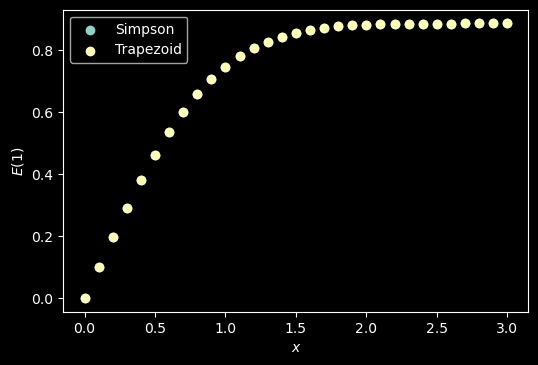

In [47]:
import matplotlib
matplotlib.rcParams['figure.dpi'] = 100
import matplotlib.pyplot as plt
plt.style.use('dark_background')

x=1
plt.scatter(x_vals, y_vals_simpson, label='Simpson')
plt.scatter(x_vals, y_vals_trapz, label='Trapezoid')
plt.xlabel(r'$x$')
plt.ylabel(r'$E({})$'.format(x))
plt.legend(loc='best')

**Exercise 5.4: The diffraction limit of a telescope**


**(a)** Write a Python function $J(m,x)$ that calculates the value of $J_m(x)$ using Simpson's rule with $N=1000$ points. Use your function in a program to make a plot, on a single graph, of the Bessel functions $J_0$, $J_1$, and $J_2$ as a function of x from $x = 0$ to $x = 20$.

$$J_m(x) = \frac{1}{\pi}\int_0^{\pi}\cos(m\theta - x\sin \theta)\text{d}\theta$$

In [48]:
class Bessel:
    def __init__(self, m, x):
        self.m = m 
        self.x = x
    def get_m(self):
        return self.m 
    def get_x(self):
        return self.x
    def integrand(self, theta):
        return (1/np.pi)*np.cos((self.m)*theta - (self.x)*np.sin(theta))
    def evaluate(self, method = 'simpson', N=1000, a = 0, b=np.pi):
        if method=='simpson':
            return simpson(Bessel(self.m,self.x).integrand, N, a, b)
        if method =='trapezoid':
            return simpson(Bessel(self.m,self.x).integrand, N, a, b)

#def bessel_func(m, x, N = 1000, a = 0, b = np.pi):
    #return simpson(Bessel(m,x).integrand, N, a, b)
#bessel_func(1,2)

Bessel(1,2).evaluate()

0.5767248077568735

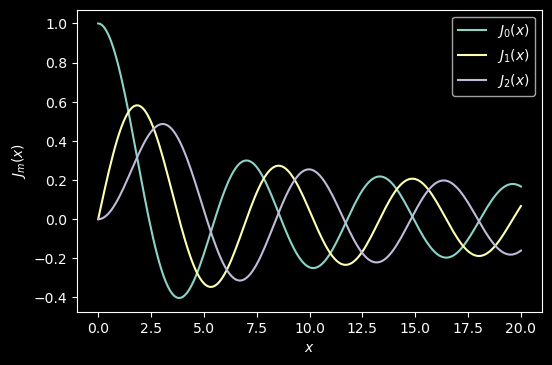

In [49]:
step = 0.1
m_vals = [0,1,2]
X_vals = np.arange(0, 20+step, step)
for mVal in m_vals: 
    integ_vals=np.array([Bessel(mVal, xVal).evaluate() for xVal in X_vals])
    text_label = r'$J_{}(x)$'.format(mVal)
    plt.plot(X_vals, integ_vals, label=text_label)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$J_m(x)$')
plt.legend(loc='best')

**(b)** Make a density plot of the intensity of the circular diffraction pattern with $\lambda = 500$ nm, with $r$ from $0$ to $1\ \mu\text{m}$. 
$$ I(r) = \left[\frac{J_1(kr)}{kr}\right]^2$$
where $k= 2\pi/\lambda$

C:\Users\Ron\AppData\Local\Temp/ipykernel_9828/1588117410.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return ((Bessel(1,kr).evaluate()/kr))**2


Text(0, 0.5, '$I(r)$')

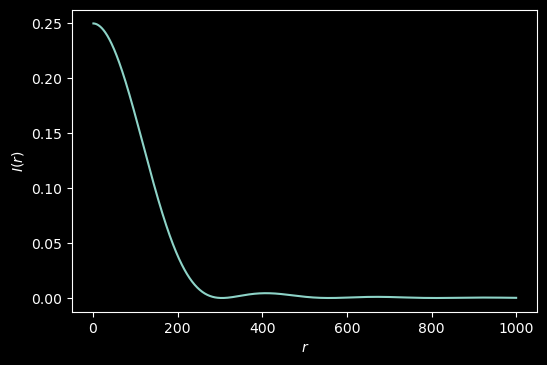

In [50]:
def intensity(r, wavelength):
    kr = (2*np.pi)*r/wavelength
    return ((Bessel(1,kr).evaluate()/kr))**2

r_vals = np.linspace(0,1000, 1000, endpoint=True)
r_vals
intensities = np.array([intensity(r, 500) for r in r_vals])
plt.plot(r_vals, intensities)
plt.xlabel(r'$r$')
plt.ylabel(r'$I(r)$')